Problem 1:
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance
Problem 2:
How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.
Problem 3:
Identify which all stocks are moving together and which all stocks are different from each other.

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [2]:
# Load the dataset

data = pd.read_csv('data_stocks.csv')
data.head(2)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.33,143.68,129.63,82.04,102.23,85.22,59.76,121.52,...,84.37,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.35
1,1491226260,2364.1001,42.36,143.70,130.32,82.08,102.14,85.65,59.84,121.48,...,84.37,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.35


In [3]:
# Check the data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
# List the columns present
data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [5]:
# Create a copy of the data to work with
X = data.copy()

In [6]:
# Drop the date column
X=X.drop(columns='DATE')

In [7]:
# Remove SP500 column
y=X.pop('SP500')

In [8]:
X.columns

Index(['NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI', 'NASDAQ.ADP',
       'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN', 'NASDAQ.AMAT',
       'NASDAQ.AMD',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=500)

PCA Analysis

In [9]:
# Do a PCA analysis

pca = PCA(n_components=5)

In [10]:
# Fit the PCA 
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
X_pca = pca.transform(X)

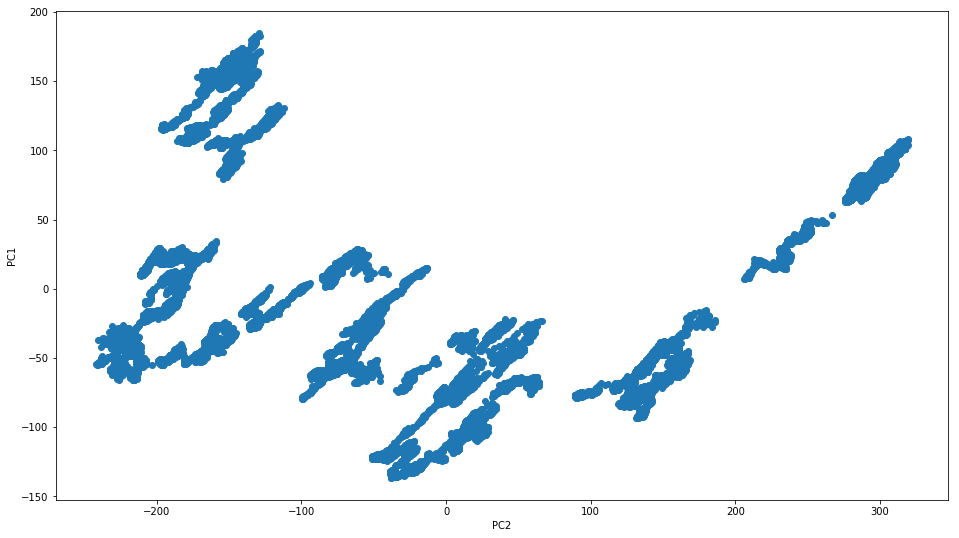

In [12]:
# Plot the PCA components 

plt.figure(figsize=(16,9))
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()

In [13]:
pca.explained_variance_

array([29552.09265369,  6861.74983656,  3733.21310127,  1561.28103561,
         537.83502882])

KMeans Clustering

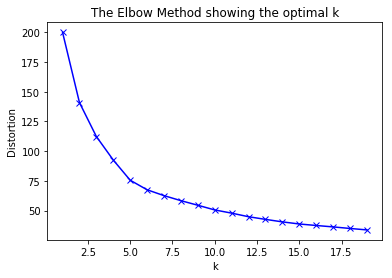

In [14]:
# Find the number of clusters

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
# Fit the K Means with 5 clusters
k_means = KMeans(n_clusters=5, random_state=0,max_iter=3000) 
y_means = k_means.fit_predict(X)

In [16]:
# Display the cluster centers
k_means.cluster_centers_

array([[ 43.77358132, 142.98696747, 130.74934798, ...,  64.62368362,
        120.79942516,  53.63660808],
       [ 46.2734716 , 160.11520883, 150.24007608, ...,  76.00650235,
        112.7923117 ,  61.19815181],
       [ 49.26457875, 148.64841274, 141.54205293, ...,  73.30668488,
        124.86423224,  62.56597652],
       [ 45.09849074, 151.07393826, 135.6250932 , ...,  68.61520574,
        118.89374393,  58.85615306],
       [ 51.72587735, 151.06200533, 146.92356499, ...,  74.45093304,
        125.61319585,  62.33830194]])

In [17]:
# Predicted Values 
k_means.labels_.ravel()

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [18]:
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)

In [19]:
k_means_labels = metrics.pairwise_distances_argmin(X, k_means_cluster_centers)

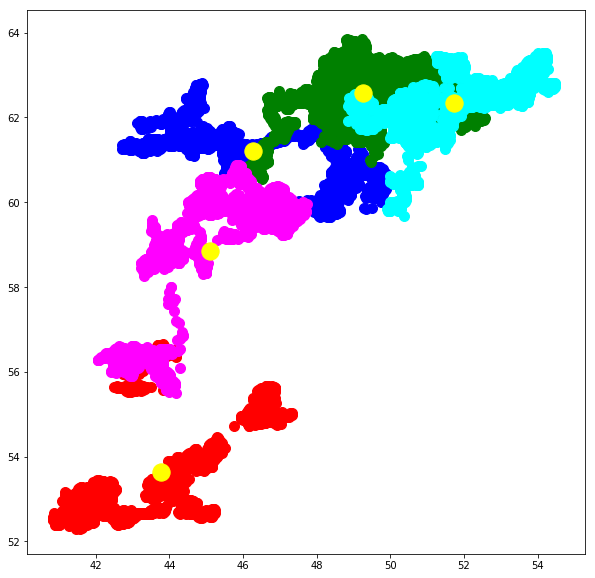

In [20]:
# Plot the cluster values. 
plt.figure(figsize=(10,10))
plt.scatter(X.iloc[y_means == 0,0], X.iloc[y_means == 0,499], s= 100, color = 'red')
plt.scatter(X.iloc[y_means == 1,0], X.iloc[y_means == 1,499], s= 100, color = 'blue')
plt.scatter(X.iloc[y_means == 2,0], X.iloc[y_means == 2,499], s= 100, color = 'green')
plt.scatter(X.iloc[y_means == 3,0], X.iloc[y_means == 3,499], s= 100, color = 'magenta')
plt.scatter(X.iloc[y_means == 4,0], X.iloc[y_means == 4,499], s= 100, color = 'cyan')

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:, 499], s= 300, color = 'yellow')
plt.show()

In [21]:
# How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.
print ('Number of patterns in the first cluster  :  ', X.iloc[y_means == 0,0].size)
print ('Number of patterns in the second cluster :  ', X.iloc[y_means == 1,0].size)
print ('Number of patterns in the third cluster  :  ', X.iloc[y_means == 2,0].size)
print ('Number of patterns in the fourth cluster :  ', X.iloc[y_means == 3,0].size)
print ('Number of patterns in the fifth cluster  :  ', X.iloc[y_means == 4,0].size)

Number of patterns in the first cluster  :   6976
Number of patterns in the second cluster :   6647
Number of patterns in the third cluster  :   12029
Number of patterns in the fourth cluster :   6709
Number of patterns in the fifth cluster  :   8905


#Identify which all stocks are moving together and which all stocks are different from each other.
This is predicted by the kmeans clustering above. 